


## 1. Task description

You will work on a news article classification task.
The provided dataset includes a total of 800 articles taken from Reuters newswire.
They belong to 4 classes: "earn" (0), "crude" (1), "trade" (2) and "interest" (3).
There are 200 articles per class.
Each article is characterised by word occurrences.
The list of used words is called a vocabulary.
In our dataset, the vocabulary includes a total of 6428 words. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse

data, labels, class_names, vocabulary = np.load("ReutersNews_4Classes_sparse.npy", allow_pickle=True)

### A Note on Sparsity

Most documents only contain a small subset of the vocabulary, resulting in a very sparse data matrix.
To handle the sparsity, in this exercise `data` is represented as a `scipy.sparse.csr_matrix`, which can store sparse matrices efficiently while still allowing efficient row-based indexing.
You can learn more about `csr_matrix` and other ways of dealing with sparse matrices at https://docs.scipy.org/doc/scipy/reference/sparse.html.

Note, however, that `data` is **not** a normal NumPy array.
While most operations will be the same as with a normal dense array, **you cannot use a sparse matrix to index another matrix**.
If you need to do this, either first convert the matrix to a NumPy array with the `toarray()` method, or use methods specifically designed to work with sparse matrices.

In [2]:
print(data[41,:]) # A sparse row vector; the output will be the non-zero indices and their values.
print(data[41,:].toarray()) # Convert back to a NumPy array. Note that the result is a (1, 6428) matrix, not a vector.
# print(vocabulary[data[41,:] > 0]) # Can't index vocabulary with a sparse matrix.
rows, columns, values = scipy.sparse.find(data[41,:]) # Find the non-zero entries in the 42nd document.
print(vocabulary[columns]) # Prints the words present in the 42nd document.

  (0, 2)	1
  (0, 3)	3
  (0, 5)	1
  (0, 8)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 21)	2
  (0, 24)	1
  (0, 105)	1
  (0, 127)	1
  (0, 227)	1
  (0, 275)	1
  (0, 334)	2
  (0, 341)	1
  (0, 348)	1
  (0, 359)	1
  (0, 411)	1
  (0, 426)	1
  (0, 1428)	1
  (0, 2058)	1
  (0, 5555)	1
[[0 0 1 ... 0 0 0]]
['share' 'split' 'say' 'two-for-one' 'shareholder' 'annual' 'meeting'
 'reuter' 'ct' 'note' 'company' 'pay' 'subject' 'increase' 'stock'
 'dividend' 'april' 'northern' 'declare' 'approval' 'telecom' 'post-split'
 'nt']


To see the full vocabulary, you can run

In [3]:
print(", ".join(vocabulary))

island, telephone, share, split, approve, say, previously, announce, two-for-one, common, shareholder, annual, meeting, reuter, year, net, shr, loss, nil, vs, profit, ct, rev, mln, note, current, include, charge, discontinue, operation, dlr, ec, state, tax, majority, european, community, member, strong, reservation, import, domestically-produced, oil, fat, propose, commission, senior, diplomat, special, committee, agricultural, expert, voice, objection, measure, prepare, ground, farm, begin, monday, add, france, italy, indicate, support, proposal, lead, initially, tonne, 1987/88, price, round, complete, sale, french, unit, business, compagnie, francaise, group, investor, employee, minnesota, disclose, term, deal, plan, asset, electronic, shoe, town, end, jan, respectively, december, wisconsin, fwb, buy, bank, corp, acquire, bancshare, cash, acquisition, hold, company, total, billion, purchase, time, earning, office, paul, area, american, product, 3rd, qtr, period, feb, mth, avg, 4th, s

You can see how many times article $i$ contains word $j$ using

In [4]:
i, j = 300, 2
print(data[i,j])

0


You can see which class the $i$th article belongs to using

In [5]:
print(labels[i])

1


For instance, by running

In [6]:
print("Occurrences:", data[0,10])
print("Class:", class_names[labels[0]])
print("Word:", vocabulary[10])

Occurrences: 2
Class: earn
Word: shareholder


you can see that the 11th word appears twice in the first document, the first document belongs to the class "earn", and the 11th word is "shareholder".

The following function randomly selects a subset of the data.

In [7]:
def sample_indices(labels, *num_per_class):
    """
    Returns randomly selected indices. It will return the specified number of indices for each class.
    """
    indices = []
    for cls, num in enumerate(num_per_class):
        cls_indices = np.where(labels == cls)[0]
        indices.extend(np.random.choice(cls_indices, size=num, replace=False))
    return np.array(indices)

For instance, to get one sample from the first class, two from the second, three from the third, and four from the fourth, you can run:

In [8]:
indices = sample_indices(labels, 1, 2, 3, 4)
print("Returned indices:", indices)
print("Samples:", data[indices])
print("Corresponding classes:", labels[indices])

Returned indices: [173 374 282 588 496 485 757 674 790 612]
Samples:   (0, 5)	1
  (0, 13)	1
  (0, 14)	1
  (0, 16)	1
  (0, 19)	12
  (0, 20)	2
  (0, 23)	18
  (0, 24)	1
  (0, 26)	1
  (0, 27)	1
  (0, 33)	1
  (0, 86)	1
  (0, 105)	1
  (0, 204)	1
  (0, 211)	1
  (0, 300)	1
  (0, 331)	1
  (0, 441)	1
  (0, 661)	1
  (0, 771)	1
  (0, 776)	1
  (0, 1030)	1
  (0, 1256)	1
  (0, 1270)	1
  (0, 1278)	1
  :	:
  (9, 254)	5
  (9, 267)	1
  (9, 332)	3
  (9, 367)	1
  (9, 396)	3
  (9, 434)	1
  (9, 435)	2
  (9, 437)	4
  (9, 527)	1
  (9, 544)	1
  (9, 640)	1
  (9, 645)	1
  (9, 676)	1
  (9, 818)	1
  (9, 837)	1
  (9, 842)	2
  (9, 959)	1
  (9, 979)	1
  (9, 984)	1
  (9, 1507)	1
  (9, 1691)	1
  (9, 2059)	1
  (9, 2357)	1
  (9, 2497)	1
  (9, 3092)	1
Corresponding classes: [0 1 1 2 2 2 3 3 3 3]


## 3. k-NN Implementation (Normal)

Now, you will need to implement a k-NN classifier by filling the code below. This function should support two types of distance measures: Euclidean distance and cosine distance (defined as 1 - cosine similarity). It should take a set of training samples, a user-specified neighbour number, a distance option, and features of a set of testing samples as the input. It should return the predicted classes for the input set of testing samples.


In [9]:

import scipy.stats
from sklearn.metrics import pairwise_distances as cdist

def knn_classify(test_samples, training_data, training_labels, metric="euclidean", k=1):
    """
    Performs k-nearest neighbour classification on the provided samples,
    given training data and the corresponding labels.
    
    test_samples: An m x d matrix of m samples to classify, each with d features.
    training_data: An n x d matrix consisting of n training samples, each with d features.
    training_labels: A vector of size n, where training_labels[i] is the label of training_data[i].
    metric: The metric to use for calculating distances between samples.
    k: The number of nearest neighbours to use for classification.
    
    Returns: A vector of size m, where out[i] is the predicted class of test_samples[i].
    """
    if (metric == "euclidean"):
        a = np.sum(test_samples.power(2),axis=1).reshape(test_samples.shape[0],1)
        b = np.sum(training_data.power(2),axis=1).reshape(1,training_data.shape[0])
        xfer = 2*test_samples@training_data.T
        pairwise_distance_custom = np.sqrt(a - xfer + b)
    else:
        a = np.sqrt(np.sum(test_samples.power(2),axis=1).reshape(test_samples.shape[0],1))
        b = np.sqrt(np.sum(training_data.power(2),axis=1).reshape(1,training_data.shape[0]))
        pairwise_distance_custom = np.ones([test_samples.shape[0],training_data.shape[0]]) - (test_samples@training_data.T)/(a*b)

    # Calculate an m x n distance matrix.
    pairwise_distance = cdist(test_samples, training_data, metric=metric)
    if not np.allclose(pairwise_distance, pairwise_distance_custom):
        print("Errors in distance implementation?")
    
    # Find the k nearest neighbours of each samples as an m x k matrix of indices.
    nearest_neighbours = np.argsort(pairwise_distance, axis=1)[:, :k]
    
    # Look up the classes corresponding to each index.
    nearest_labels = training_labels[nearest_neighbours]
    
    # Return the most frequent class on each row.
    # Note: Ensure that the returned vector does not contain any empty dimensions.
    # You may find the squeeze method useful here.
    return np.squeeze(scipy.stats.mode(nearest_labels, axis=1)[0])

## 4. Experiments 

Use your k-NN function to perform the following experiments.

### Experiment 1 ( Easy)

Randomly select 80 articles per class for training, and use the remaining articles for testing.
Fix a neighbour number setting as you see fit. Perform k-NN classification using the Euclidean distance and test it. Repeat this process 20 times (trials).

Calculate the mean and standard deviation of the testing accuracies. Print out the mean and standard deviation.

In [10]:
def KNN_trial(num_trials, k, num_per_class_train, metric):
    train_accuracies = np.zeros(num_trials)
    test_accuracies = np.zeros(num_trials)
    for i in range(num_trials):
        train_inds = sample_indices(labels, *([num_per_class_train] * 4))
        test_inds = np.delete(np.arange(labels.size), train_inds)
        train_data, train_labels = data[train_inds, :], labels[train_inds]
        test_data, test_labels = data[test_inds, :], labels[test_inds]
        train_prediction = knn_classify(train_data, train_data, train_labels, metric=metric, k=k)
        test_prediction = knn_classify(test_data, train_data, train_labels, metric=metric, k=k)
        train_accuracies[i] = np.sum(train_prediction == train_labels) / train_labels.size
        test_accuracies[i] = np.sum(test_prediction == test_labels) / test_labels.size

    return train_accuracies, test_accuracies

In [11]:
%%time
train_acc, test_acc = KNN_trial(num_trials=20, k=1, num_per_class_train=80, metric='euclidean')

test_mean = np.mean(test_acc)
test_std = np.std(test_acc)

print('Mean: {:3f}'.format(test_mean))
print('Std: {:3f}'.format(test_std))

/var/folders/kh/r0d98wss75j684rlht3w5qmw0000gn/T/ipykernel_16847/4173653255.py:41: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return np.squeeze(scipy.stats.mode(nearest_labels, axis=1)[0])


Mean: 0.897292
Std: 0.018774
CPU times: user 565 ms, sys: 55.6 ms, total: 620 ms
Wall time: 698 ms


Use the same neighbour number, but use the cosine distance instead of the Euclidean distance.
Repeat the same experiment.

Print out the mean and standard deviation.

In [12]:
train_acc, test_acc = KNN_trial(num_trials=20, k=1, num_per_class_train=80, metric='cosine')

test_mean = np.mean(test_acc)
test_std = np.std(test_acc)

print('Mean: {:3f}'.format(test_mean))
print('Std: {:3f}'.format(test_std))

/var/folders/kh/r0d98wss75j684rlht3w5qmw0000gn/T/ipykernel_16847/4173653255.py:41: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return np.squeeze(scipy.stats.mode(nearest_labels, axis=1)[0])


Mean: 0.962188
Std: 0.008366


Question: Which distance measure gives better performance and analyse the reason?

**Example answer:** The cosine distance measure gives a better performance. This is because it does not take into account the number of occurrences of a word in an article, only the the vocabulary/subject in common. In this way it can compare the subject matter of articles without being biased by article length (longer articles may have a lot of repeated words and have a higher word count for some words). 

### Experiment 2 (Easy)

Using the distance measure that you found performs better in Experiment 1. Randomly select 80 articles per class for training, and use the remaining articles for testing. 

Perform k-NN classification with the neighbour number $k$ varying from 1 to 50. For each values of $k$, repeat the training process by 20 trials and record the average training error rates and standard deviation.

Do the same for testing errors.

In [13]:
%%time

train_outcome = np.zeros((50,2))
test_outcome = np.zeros((50,2))
train_accuracies = np.zeros((50,20))
test_accuracies = np.zeros((50,20))

for k in range(50):
    train_acc, test_acc = KNN_trial(num_trials=20, k=k+1, num_per_class_train=80, metric='cosine')
    train_mean = np.mean(train_acc)
    train_std = np.std(train_acc)
    test_mean = np.mean(test_acc)
    test_std = np.std(test_acc)
    train_outcome[k,0] = train_mean
    train_outcome[k,1] = train_std
    test_outcome[k,0] = test_mean
    test_outcome[k,1] = test_std
    train_accuracies[k,:] = train_acc
    test_accuracies[k,:] = test_acc

/var/folders/kh/r0d98wss75j684rlht3w5qmw0000gn/T/ipykernel_16847/4173653255.py:41: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return np.squeeze(scipy.stats.mode(nearest_labels, axis=1)[0])


CPU times: user 24.6 s, sys: 1.38 s, total: 26 s
Wall time: 27.2 s


Produce an error bar plot showing the training error rate for each $k$ here:

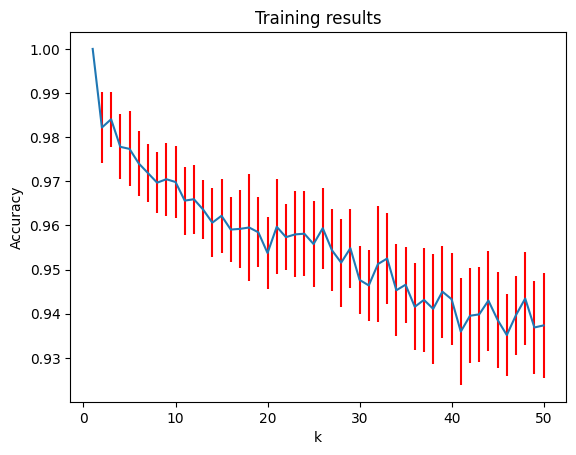

In [14]:
K = 50
plt.errorbar(np.arange(K) + 1, train_outcome[:,0], yerr=train_outcome[:,1], ecolor='r')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Training results')
plt.show()

Produce your testing error bar plot here:

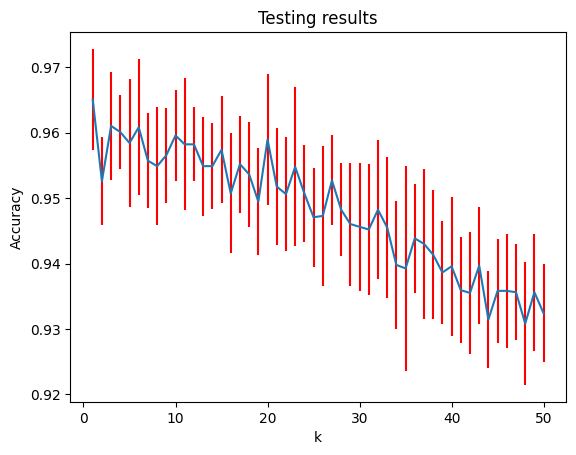

In [15]:
plt.errorbar(np.arange(K) + 1, test_outcome[:,0], yerr=test_outcome[:,1], ecolor='r')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Testing results')
plt.show()

**Remember that all graphs should have axis labels and a title.**

### Experiment 3 (Hard)

In this experiment we will create confusion matrices for a more detailed view on our model's performance. First, randomly select 100 articles per class for training, and use the remaining articles for testing. Set the neighbour number to $k=3$. Perform 3-NN classification using the Cosine distance, as in previous experiments.

Implement a multi-class confusion matrix yourself, from scratch. Let the row index correspond to the known label, and column index to predicted label. 

Print out the overall accuracy of your classifier.

In [16]:
train_idxs = sample_indices(labels, 100, 100, 100, 100)
test_idxs = np.delete(np.arange(800), train_idxs)
train_data, train_labels = data[train_idxs, :], labels[train_idxs]
test_data, test_labels = data[test_idxs, :], labels[test_idxs] 
test_prediction = knn_classify(test_data, train_data, train_labels, metric='cosine', k=3)

/var/folders/kh/r0d98wss75j684rlht3w5qmw0000gn/T/ipykernel_16847/4173653255.py:41: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return np.squeeze(scipy.stats.mode(nearest_labels, axis=1)[0])


In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_prediction, test_labels)

array([[ 95,   1,   2,   0],
       [  0,  97,   1,   0],
       [  3,   1,  94,   0],
       [  2,   1,   3, 100]])

In [18]:
def create_cm(pred_labels, targets, classes=None):
    # infer classes from targets and labels if none are given
    if classes==None:
        test_cl = np.unique(pred_labels)
        target_cl = np.unique(targets)
        classes = np.union1d(test_cl, target_cl)
    
    # create an identity matrix
    ext = np.eye(classes.size, dtype=int)
    
    # Use the labels as indices in the identity matrix, 
    # basically one hot encoding each label. Gives an 
    # n_samples*n_classes matrix of 0s and 1s. Multiplying
    # by the transpose sums the samples for respective class
    # (predicted or target) to give a square CM.
    cm = ext[pred_labels].T @ ext[targets]
    return cm

In [19]:
create_cm(test_prediction, test_labels)

array([[ 95,   1,   2,   0],
       [  0,  97,   1,   0],
       [  3,   1,  94,   0],
       [  2,   1,   3, 100]])

In [20]:
np.mean(test_prediction == test_labels)

0.965

## 5. Result Analysis  

### Analysis 1 (Normal)
Choose a training-testing trial in Experiment 2 for $k=1$. Observe the testing error of this 1-NN, and estimate the interval where its true error lies with 90% probability. 

**Example Answer**

The hypothesis is: A 1-NN classifier trained on a sample set with $80 \times 4$ training samples. 

The test set has a total of $n = 800 - 80 \times 4 = 480$ testing samples.

The sample error of this classifier is $error_s = 0.046$.

Because we want to estimate the interval where its true error lies with $90\%$ proability, from the table of $z_p$ value for two-sided $p$ confidence interval on page 9 (or 8 according to the subscript) of the Chapter 3C, $z_p = 1.64$.

$$
a = z_p\sqrt{\frac{error_s(1-error_s)}{n}} = 1.64 \times \sqrt{\frac{0.046(1-0.046)}{480}} \approx 0.016
$$

Then, with $90\%$ probability, the true error lies in the interval of 
$$
error_d \in [0.046 - 0.016, 0.046 + 0.016]
$$

In [21]:
# Python code example

# The hypothesis 1 : A 1-NN classifier trained on the training set with 80 * 4 training samples.
# From the table of zp value, when the confidence level p = 90%, zp = 1.64
# The test set has 800 - 80 * 4 = 480 samples.

######

# This is the common way to find the testing sample error of 15-NN
# test_acc_1 = test_accuracies[0,1]
# test_error_1 = 1 - test_acc_1

######
import numpy as np


test_error_1 = 0.02708

print('The testing error of this 1-NN is')
print( test_error_1)
print()
n = 480
zp = 1.64
a = zp * np.sqrt((test_error_1 * (1 - test_error_1))/ n)

print(f'The value of a of the 90% probability is {a:0.4f}.')
print(f'The confidence interval of the true error is [{test_error_1:0.3f} - {a:0.3f}, {test_error_1:0.3f} + {a:0.3f}]') 

The testing error of this 1-NN is
0.02708

The value of a of the 90% probability is 0.0122.
The confidence interval of the true error is [0.027 - 0.012, 0.027 + 0.012]


### Analysis 2 (Normal)
The following function `Get_p_value()` is provided to obtain $p$ according to $z_p$, to be used later.

In [22]:
# run this cell first

def Get_p_value(zp):
    return round(1 - scipy.stats.norm.sf(abs(zp))*2,2)

In [23]:
# Use this cell to compare the output value of function Get_p_value with 
# the table provided in your lecture notes (e.g., Slide 12, Chapter3C.pdf)

print('zp = 0.67, p = ', Get_p_value(0.67))
print('zp = 1, p = ', Get_p_value(1))
print('zp = 1.64, p = ', Get_p_value(1.64))
print('zp = 2.58, p = ', Get_p_value(2.58))
print()

# you can alert the input zp value and re-run this cell to help you to calculate the corresponding p.
print('p = ', Get_p_value(0.43))  


# you can change 0.43 to any zp value you obtained.

zp = 0.67, p =  0.5
zp = 1, p =  0.68
zp = 1.64, p =  0.9
zp = 2.58, p =  0.99

p =  0.33


Choose a training-testing trial in Experiment 2 for k=45. Observe the testing error of this 45-NN. Compare it with the 1-NN in Analysis 1. Which one has higher testing sample error? Estimate the probability that it also has higher true error. 

**Example solution**

Here is the example of the latex version.

Hypothesis:

Classifier A: A 1-NN classifier trained on the training set with 80 * 4 training samples.

Classifier B: A 45-NN classifier trained on the traning set with 80 * 4 training samples.

The test set has a total of $n = 800 - 80 \times 4 = 480$ testing samples.

The sample error of 1-NN classifier is $error_{s1} = 0.046$.

The sample error of 45-NN classifier is $error_{s2} = 0.052$.

The 45-NN has higher testing error.

To compute $z_p = d/\sigma$, we have

$$
d =|error_{s2} - error_{s1}| = |0.052 - 0.046| = 0.006
$$

$$
\sigma = \sqrt{\frac{error_{s1}(1-error_{s1})}{n} + \frac{error_{s2}(1-error_{s2})}{n}} = \sqrt{\frac{0.046 \times(1-0.046)}{480} + \frac{0.052\times(1-0.052)}{480}} = 0.014
$$

Thus, $z_p = 0.006 / 0.014 = 0.43$. According to `Get_p_value()`, $p=0.33$.

Then, the final probability is

$$
C = 1 - \frac{(1-p)}{2} = 1 - \frac{(1-0.33)}{2} = 0.665.
$$



In [24]:
# Python code example

# Classifier A: A 1-NN classifier trained on the training set with 80 * 4 training samples.
# Classifier B: A 45-NN classifier trained on the traning set with 80 * 4 training samples.
# The test set has 800 - 80 * 4 = 480 samples.

######

# This is the common way to find the testing sample error of 45-NN

# test_acc_45 = test_accuracies[45, 14]
# test_error_45 = 1 - test_acc_45

######

# If you are testing the student's result, you can change the given errors.
# Note that you may need to control decimal places according to the student's settings,
# especially when you calculate d and sigma later.

test_error_1 = 0.059
test_error_45 = 0.067


print('The testing error of this 45-NN is')
print(test_error_45)
print()
print('The testing error of this 1-NN is')
print( test_error_1)
print()



diff = test_error_1 - test_error_45

# The student is not required to do this if condition to find out which one has a larger testing sample error.

if diff > 0:
    print('This 1-NN has a higher testing sample error.')
    e_h = test_error_1
    e_l = test_error_45
    flag = 1
elif diff < 0:
    print('This 45-NN has a higher testing sample error.')
    e_h = test_error_45
    e_l = test_error_1
    flag = 1
else:
    print('They has the sample testing sample error.')
    print('Select another trial.')
    flag = 0

###########################################################
    
    
if flag == 1:
    n = 480
    d = abs(e_h - e_l)
    sigma = np.sqrt((e_h * (1 - e_h))/n + (e_l * (1 - e_l))/n)
    print(f'd = {d:.4f}')
    print(f'sigma = {sigma:.4f}')
    zp = round(d / sigma,2)
    print(f'The zp value is {zp}.')

    p = Get_p_value(zp)
    print(f'The confidence value p is {p}.')

    C = 1- (1-p)/2
    print(f'The probability it also has higher true error is {C:.4f}.')

The testing error of this 45-NN is
0.067

The testing error of this 1-NN is
0.059

This 45-NN has a higher testing sample error.
d = 0.0080
sigma = 0.0157
The zp value is 0.51.
The confidence value p is 0.39.
The probability it also has higher true error is 0.6950.
